In [97]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
from scipy import integrate
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [98]:
# 1 punto

In [99]:
#Funciones necesarias
#Nota: Angulos en radianes y se usa el S.I

#Tiempo a partir del angulo en radianes
def T(Angulo):
    tiempo = 3.0/(500.0*np.pi)*Angulo
    return tiempo

#Posicion:
def X(t,R=0.09):
    Teta = 500*np.pi/3.0 # Velocidad angular en rad/seg
    Pos = ( np.cos(Teta*t) + ( 2.5**2 - np.sin(Teta*t)**2 )**0.5 )*R
    return Pos

#Derivadas

#Derivada de 2 orden para puntos medios
def der_2_medio(y,i,h):
    return ( y[i+1] + y[i-1] - 2*y[i] )/h**2.0

#Derivada de 2 orden para puntos extremos
def der_2_ext(y,i,h):
    return ( y[i+2] - 2*y[i+1] + y[i] )/h**2.0

In [100]:
#Listas

#Angulos desde 0 hasta 360 grados (un ciclo completo) (en radianes)
Os = []                         
for i in xrange(0,73):
    Rad = np.pi/180.0 #En radianes
    Os.append(5*Rad*i)
Tetas = np.array(Os)

#Tiempos y h
Ts = T(Tetas)
h = abs(Ts[1]-Ts[0])

#Posiciones para cada tiempo
Ps = X(Ts)
#print len(Tetas),len(Ts),len(Ps)

In [101]:
#Calculo de la aceleracion

A = []
A.append(der_2_ext(Ps,0,h)) # Aceleracion inicial

for i in xrange(1,len(Ts)-1):
    Acel = der_2_medio(Ps,i,h)
    A.append(Acel)
#print "Las aceleraciones para cada tiempo son: ", A

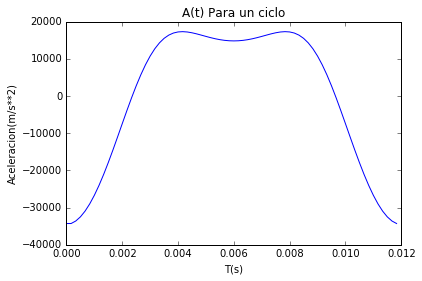

In [102]:
#Grafico
plt.plot(Ts[:len(Ts)-1],A)
plt.title('A(t) Para un ciclo')
plt.xlabel('T(s)')
plt.ylabel('Aceleracion(m/s**2)')

In [103]:
"""
Vemos entonces que durante medio ciclo la aceleracion aumenta hasta un valor y baja un poco pero luego repite
este comportamiento para el otro medio ciclo pero con signo (sentido) contrario
"""

'\nVemos entonces que durante medio ciclo la aceleracion aumenta hasta un valor y baja un poco pero luego repite\neste comportamiento para el otro medio ciclo pero con signo (sentido) contrario\n'

In [104]:
# 2 Punto

In [105]:
#Matrix del sistema de ecuaciones y vector b (Ax=b)
def Matrix(R,r):
    M = np.matrix([[ 1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0],
                   [-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0],
                   [0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,1.0],
                   [-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0],
                   [0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0],
                   [0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0],
                   [0.0,0.0,r/R,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0],
                   [-1.0,-1.0,r/R,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0]])
    return M

b = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1])

In [106]:
#Matrices para varios r
R = 1.0
V = 1.0
r = np.arange(0.0,R+0.1,0.1)

A = []
S = []
x_13 = []
I_13 = []
R_eq = []

#Aderiendo matrices A_i para cada r a el vector de matrices A
for i in xrange(0,len(r)):
    A_i = Matrix(R,r[i])
    A_i = np.matrix(A_i)
    A.append(A_i)

#Soluciones
for i in xrange(len(A)):
    S_i = b.dot(A[i].I)
    S.append(S_i)

#Tomando la solucion para x_13 y convirtiendola en la respectiva I_13
for i in xrange(len(S)):
    XS = S[i][0,12]
    IS = XS*V/R
    x_13.append(XS)
    I_13.append(IS)
    R_eq.append(V/IS)

La resistencia equivalente para r=R es  0.833333333333


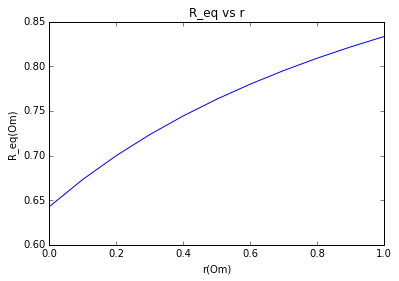

In [107]:
#Resultados

#R_eq para r=R
R_f = R_eq[-1]
print "La resistencia equivalente para r=R es ",R_f

#Grafico
plt.plot(r,R_eq)
plt.title("R_eq vs r")
plt.xlabel("r(Om)")
plt.ylabel("R_eq(Om)")

In [108]:
"""
Vemos entonces que a medida que r aumenta la resistencia equivalente tambien lo hace.
Cuando r=R se obtiene que R_eq = 0.833333333333 (independientemente de R) que es igual a 5/6.
"""

'\nVemos entonces que a medida que r aumenta la resistencia equivalente tambien lo hace.\nCuando r=R se obtiene que R_eq = 0.833333333333 (independientemente de R) que es igual a 5/6.\n'

In [109]:
# 3 punto

In [110]:
#Metodos de integracion

#Metodo de Gauss
def I_g(f,a,b):
    Suma1 = 0.5*(b-a)*f( 0.5*(b-a)*(-1/3**0.5) + 0.5*(b+a) ) 
    Suma2 = 0.5*(b-a)*f( 0.5*(b-a)*(1./3**0.5) + 0.5*(b+a) ) 
    return Suma1 + Suma2

#Simpson
def Simpson(h,ly):
    simpson =  h*( ly[0] + 4.0*ly[1] + ly[-1] )/3.0
    return simpson

#Regla compuesta del trapecio (Formula dada en el repositorio de Sebastian)
def Trapecio(f,a,b,N):
    #Caracteristicas de la suma
    h = (b-a)/(1.0*N)
    lim = int(N)
    
    #Elementos en x en los cuales se evalua la funcion a integrar
    l_x = np.linspace(a,b,N)
    
    #Suma
    sumat = 0.0
    for i in xrange(1,lim-1):
        sumat = sumat + f(l_x[i])
        
    return 0.5*h*( 2*sumat + f(l_x[0]) + f(l_x[-1]) )

In [111]:
#Funciones a integrar
def f_1(x):
    return x**2*np.log(x)
def f_2(x):
    return x**2*np.exp(-x)
def f_3(x):
    return 2/(x**2-4.0)
def f_4(x):
    return np.exp(3*x)*np.sin(2*x)

#Limites de integracion
a = [1.0,0.0,0.0,0.0]
b = [1.5,1.0,0.35,np.pi/4.0]

In [116]:
#Integracion por Gauss
I_1_g = I_g(f_1,a[0],b[0])
I_2_g = I_g(f_2,a[1],b[1])
I_3_g = I_g(f_3,a[2],b[2])
I_4_g = I_g(f_4,a[3],b[3])

#Integracion por Simpson

#Listas en x para cada funcion para usar en Simpson
x1 = np.linspace(a[0],b[0],100)
x2 = np.linspace(a[1],b[1],100)
x3 = np.linspace(a[2],b[2],100)
x4 = np.linspace(a[3],b[3],100)

lim=int(len(x1)/2.0)
h=abs(x1[1]-x1[0])

#Listas de los valores de cada funcion en cada x
l1 = f_1(x1)
l2 = f_2(x2)
l3 = f_3(x3)
l4 = f_4(x4)

#Almacenamiento de la integracion
s1 = []
s2 = []
s3 = []
s4 = []

#Integracion
suma1 = 0.0
suma2 = 0.0
suma3 = 0.0
suma4 = 0.0

for i in xrange(0,lim):
    suma1 = suma1 + Simpson(h, l1[2*i:2*i+3])
    s1.append(suma1)
    
    suma2 = suma2 + Simpson(h, l2[2*i:2*i+3])
    s2.append(suma2)
    
    suma3 = suma3 + Simpson(h, l3[2*i:2*i+3])
    s3.append(suma3)
    
    suma4 = suma4 + Simpson(h, l4[2*i:2*i+3])
    s4.append(suma4)
    
#Integracion por trapecio
N = lim
T1 = Trapecio(f_1,a[0],b[0],N)
T2 = Trapecio(f_2,a[1],b[1],N)
T3 = Trapecio(f_3,a[2],b[2],N)
T4 = Trapecio(f_4,a[3],b[3],N)

#Integracion usando la libreria QUADPACK
R1 = sp.integrate.quad(f_1,a[0],b[0])
R2 = sp.integrate.quad(f_2,a[1],b[1])
R3 = sp.integrate.quad(f_3,a[2],b[2])
R4 = sp.integrate.quad(f_4,a[3],b[3])
        
print "Gaus :", I_1_g,I_2_g,I_3_g,I_4_g
print "Simp :", s1[-1],s2[-1],s3[-1],s4[-1]
print "Trap :", T1,T2,T3,T4
print "Real :",R1[0],R2[0],R3[0],R4[0]

Gaus : 0.192268706371 0.159410430966 -0.176818989455 2.59132471565
Simp : 0.196878463886 0.0821625021438 -0.255205337466 1.70147002657
Trap : 0.188428765786 0.157403249836 -0.173284007702 2.53747821369
Real : 0.192259357733 0.160602794143 -0.176820020122 2.58862863251


In [123]:
#Errores

#Gauss
Eg1 = I_1_g - R1[0]
Eg2 = I_2_g - R2[0]
Eg3 = I_3_g - R3[0]
Eg4 = I_4_g - R4[0]

#Simpson
Es1 = s1[-1] - R1[0]
Es2 = s2[-1] - R2[0]
Es3 = s3[-1] - R3[0]
Es4 = s4[-1] - R4[0]

#Trapecio
Et1 = T1 - R1[0]
Et2 = T2 - R2[0]
Et3 = T3 - R3[0]
Et4 = T4 - R4[0]

print "Errores Gauss:",Eg1,Eg2,Eg3,Eg4
print "Errores Simps:",Es1,Es2,Es3,Es4
print "Errores Trape:",Et1,Et2,Et3,Et4

Errores Gauss: 9.34863812155e-06 -0.00119236317641 1.03066687726e-06 0.00269608314775
Errores Simps: 0.00461910615369 -0.078440291999 -0.0783853173444 -0.887158605932
Errores Trape: -0.00383059194648 -0.00319954430644 0.00353601242009 -0.0511504188136
